Enter the states (comma-separated):  cp,ip
Enter the possible observations (comma-separated):  lem,ice-t,cola
Enter the observation sequence as space-separated names (options: ['lem', 'ice-t', 'cola']):  lem ice-t cola



Enter the state transition probabilities:


P(cp | cp):  0.7
P(ip | cp):  0.5
P(cp | ip):  0.3
P(ip | ip):  0.5



Enter the emission probabilities:


P(lem | cp):  0.3
P(ice-t | cp):  0.1
P(cola | cp):  0.6
P(lem | ip):  0.2
P(ice-t | ip):  0.7
P(cola | ip):  0.1



Enter the initial state probabilities (comma-separated):


Enter initial probabilities for ['cp', 'ip']:  1.0,0.0



Forward Matrix:
 [[0.3     0.021   0.02772]
 [0.      0.105   0.0063 ]]
Probability of the observation sequence: 0.034019999999999995


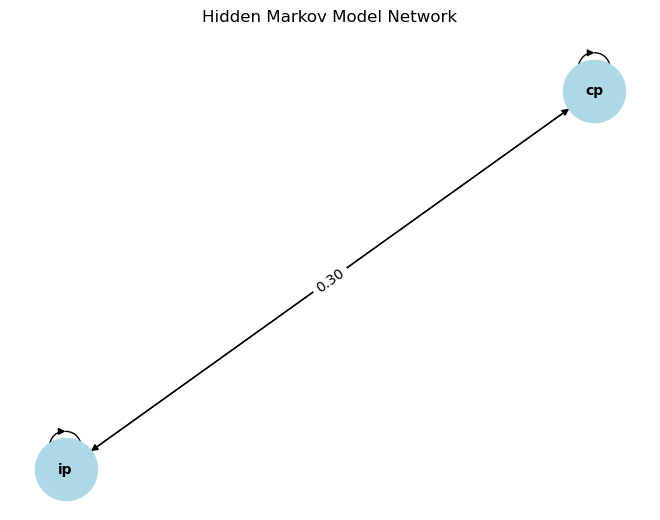

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Define states and observations based on user input
states = list(map(str.strip, input("Enter the states (comma-separated): ").split(',')))
observations = list(map(str.strip, input("Enter the possible observations (comma-separated): ").split(',')))

# Step 2: Get user input for the observation sequence
observation_seq = list(map(str.strip, input(f"Enter the observation sequence as space-separated names (options: {observations}): ").split()))

# Step 3: Convert observation sequence to indices
try:
    observation_indices = [observations.index(obs) for obs in observation_seq]
except ValueError as e:
    print(f"Error: {e}. Please make sure your observation sequence contains only valid options: {observations}.")
    exit()

# Step 4: Get user input for the transition matrix
print("\nEnter the state transition probabilities:")
transition_matrix = np.zeros((len(states), len(states)))
for i in range(len(states)):
    for j in range(len(states)):
        transition_matrix[i, j] = float(input(f"P({states[j]} | {states[i]}): "))

# Step 5: Get user input for the emission matrix
print("\nEnter the emission probabilities:")
emission_matrix = np.zeros((len(states), len(observations)))
for i in range(len(states)):
    for j in range(len(observations)):
        emission_matrix[i, j] = float(input(f"P({observations[j]} | {states[i]}): "))

# Step 6: Set initial state probabilities (ask the user to input them)
initial_probabilities = np.zeros(len(states))
print("\nEnter the initial state probabilities (comma-separated):")
initial_probabilities = list(map(float, input(f"Enter initial probabilities for {states}: ").split(',')))

# Step 7: Forward Procedure
def forward_procedure(observation_seq, transition_matrix, emission_matrix, initial_probabilities):
    num_states = len(transition_matrix)
    num_observations = len(observation_seq)
    
    # Initialize the forward matrix
    forward_matrix = np.zeros((num_states, num_observations))
    
    # Initialization step
    for i in range(num_states):
        forward_matrix[i, 0] = initial_probabilities[i] * emission_matrix[i, observation_seq[0]]
    
    # Recursion step
    for t in range(1, num_observations):
        for j in range(num_states):
            forward_matrix[j, t] = sum(forward_matrix[i, t - 1] * transition_matrix[i, j] for i in range(num_states)) * emission_matrix[j, observation_seq[t]]
    
    # Termination step
    prob_observation = sum(forward_matrix[i, num_observations - 1] for i in range(num_states))
    
    return forward_matrix, prob_observation

# Step 8: Compute the forward matrix and the probability of the observation sequence
forward_matrix, prob_observation = forward_procedure(observation_indices, transition_matrix, emission_matrix, initial_probabilities)

# Display the results
print("\nForward Matrix:\n", forward_matrix)
print("Probability of the observation sequence:", prob_observation)

# Step 9: Visualize the HMM
G = nx.DiGraph()

# Add nodes with state names
for state in states:
    G.add_node(state, shape='circle')

# Add edges with transition probabilities
for i in range(len(states)):
    for j in range(len(states)):
        if transition_matrix[i, j] > 0:
            G.add_edge(states[i], states[j], weight=transition_matrix[i, j])

# Draw the graph
pos = nx.spring_layout(G)
edges = G.edges(data=True)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold', arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f'{d["weight"]:.2f}' for u, v, d in edges})

plt.title("Hidden Markov Model Network")
plt.show()


Enter the states (comma-separated):  low,high
Enter the possible observations (comma-separated):  snow,rain,dry,sunny
Enter the observation sequence as space-separated names (options: ['snow', 'rain', 'dry', 'sunny']):  rain dry sunny snow



Enter the state transition probabilities:


P(low | low):  0.3
P(high | low):  0.5
P(low | high):  0.7
P(high | high):  0.5



Enter the emission probabilities:


P(snow | low):  0.1
P(rain | low):  0.3
P(dry | low):  0.6
P(sunny | low):  0
P(snow | high):  0
P(rain | high):  0.2
P(dry | high):  0.3
P(sunny | high):  0.5



Enter the initial state probabilities (comma-separated):


Enter initial probabilities for ['low', 'high']:  0.6,0.4



Forward Matrix:
 [[0.18      0.066     0.        0.0018375]
 [0.08      0.039     0.02625   0.       ]]
Probability of the observation sequence: 0.0018375


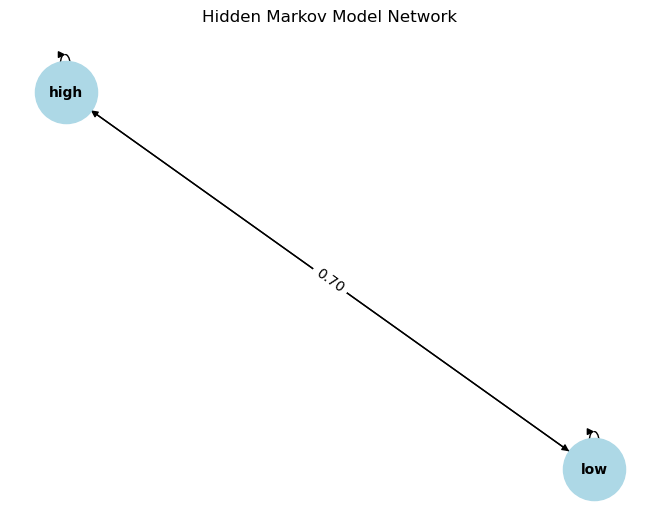

In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Define states and observations based on user input
states = list(map(str.strip, input("Enter the states (comma-separated): ").split(',')))
observations = list(map(str.strip, input("Enter the possible observations (comma-separated): ").split(',')))

# Step 2: Get user input for the observation sequence
observation_seq = list(map(str.strip, input(f"Enter the observation sequence as space-separated names (options: {observations}): ").split()))

# Step 3: Convert observation sequence to indices
try:
    observation_indices = [observations.index(obs) for obs in observation_seq]
except ValueError as e:
    print(f"Error: {e}. Please make sure your observation sequence contains only valid options: {observations}.")
    exit()

# Step 4: Get user input for the transition matrix
print("\nEnter the state transition probabilities:")
transition_matrix = np.zeros((len(states), len(states)))
for i in range(len(states)):
    for j in range(len(states)):
        transition_matrix[i, j] = float(input(f"P({states[j]} | {states[i]}): "))

# Step 5: Get user input for the emission matrix
print("\nEnter the emission probabilities:")
emission_matrix = np.zeros((len(states), len(observations)))
for i in range(len(states)):
    for j in range(len(observations)):
        emission_matrix[i, j] = float(input(f"P({observations[j]} | {states[i]}): "))

# Step 6: Set initial state probabilities (ask the user to input them)
initial_probabilities = np.zeros(len(states))
print("\nEnter the initial state probabilities (comma-separated):")
initial_probabilities = list(map(float, input(f"Enter initial probabilities for {states}: ").split(',')))

# Step 7: Forward Procedure
def forward_procedure(observation_seq, transition_matrix, emission_matrix, initial_probabilities):
    num_states = len(transition_matrix)
    num_observations = len(observation_seq)
    
    # Initialize the forward matrix
    forward_matrix = np.zeros((num_states, num_observations))
    
    # Initialization step
    for i in range(num_states):
        forward_matrix[i, 0] = initial_probabilities[i] * emission_matrix[i, observation_seq[0]]
    
    # Recursion step
    for t in range(1, num_observations):
        for j in range(num_states):
            forward_matrix[j, t] = sum(forward_matrix[i, t - 1] * transition_matrix[i, j] for i in range(num_states)) * emission_matrix[j, observation_seq[t]]
    
    # Termination step
    prob_observation = sum(forward_matrix[i, num_observations - 1] for i in range(num_states))
    
    return forward_matrix, prob_observation

# Step 8: Compute the forward matrix and the probability of the observation sequence
forward_matrix, prob_observation = forward_procedure(observation_indices, transition_matrix, emission_matrix, initial_probabilities)

# Display the results
print("\nForward Matrix:\n", forward_matrix)
print("Probability of the observation sequence:", prob_observation)

# Step 9: Visualize the HMM
G = nx.DiGraph()

# Add nodes with state names
for state in states:
    G.add_node(state, shape='circle')

# Add edges with transition probabilities
for i in range(len(states)):
    for j in range(len(states)):
        if transition_matrix[i, j] > 0:
            G.add_edge(states[i], states[j], weight=transition_matrix[i, j])

# Draw the graph
pos = nx.spring_layout(G)
edges = G.edges(data=True)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold', arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f'{d["weight"]:.2f}' for u, v, d in edges})

plt.title("Hidden Markov Model Network")
plt.show()


Enter the states (comma-separated):  regen,sonne,wolken
Enter the possible observations (comma-separated):  tro,etro,efeu,feu
Enter the observation sequence as space-separated names (options: ['tro', 'etro', 'efeu', 'feu']):  tro etro efeu feu



Enter the state transition probabilities:


P(regen | regen):  0.375
P(sonne | regen):  0.25
P(wolken | regen):  0.375
P(regen | sonne):  0.125
P(sonne | sonne):  0.5
P(wolken | sonne):  0.375
P(regen | wolken):  0.375
P(sonne | wolken):  0.25
P(wolken | wolken):  0.125



Enter the emission probabilities:


P(tro | regen):  0.05
P(etro | regen):  0.1
P(efeu | regen):  0.35
P(feu | regen):  0.5
P(tro | sonne):  0.6
P(etro | sonne):  0.2
P(efeu | sonne):  0.15
P(feu | sonne):  0.05
P(tro | wolken):  0.25
P(etro | wolken):  0.25
P(efeu | wolken):  0.25
P(feu | wolken):  0.25



Enter the initial state probabilities (comma-separated):


Enter initial probabilities for ['regen', 'sonne', 'wolken']:  1,1,1



Forward Matrix:
 [[5.00000000e-02 1.87500000e-02 1.47656250e-02 5.37597656e-03]
 [6.00000000e-01 7.50000000e-02 8.90625000e-03 5.43945313e-04]
 [2.50000000e-01 6.87500000e-02 1.09375000e-02 2.56103516e-03]]
Probability of the observation sequence: 0.00848095703125


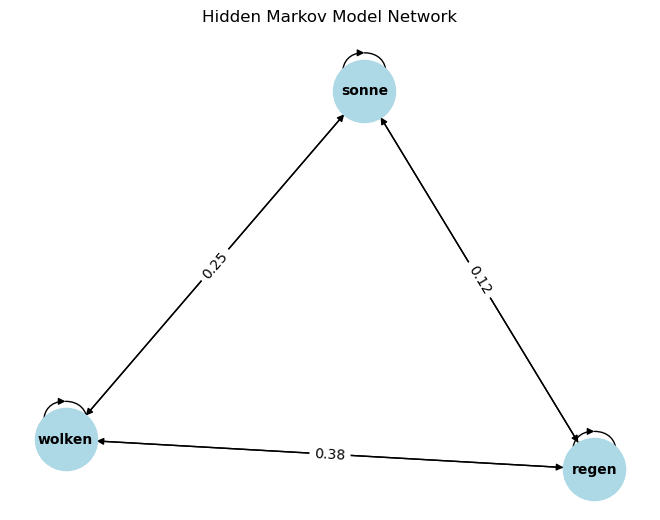

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Define states and observations based on user input
states = list(map(str.strip, input("Enter the states (comma-separated): ").split(',')))
observations = list(map(str.strip, input("Enter the possible observations (comma-separated): ").split(',')))

# Step 2: Get user input for the observation sequence
observation_seq = list(map(str.strip, input(f"Enter the observation sequence as space-separated names (options: {observations}): ").split()))

# Step 3: Convert observation sequence to indices
try:
    observation_indices = [observations.index(obs) for obs in observation_seq]
except ValueError as e:
    print(f"Error: {e}. Please make sure your observation sequence contains only valid options: {observations}.")
    exit()

# Step 4: Get user input for the transition matrix
print("\nEnter the state transition probabilities:")
transition_matrix = np.zeros((len(states), len(states)))
for i in range(len(states)):
    for j in range(len(states)):
        transition_matrix[i, j] = float(input(f"P({states[j]} | {states[i]}): "))

# Step 5: Get user input for the emission matrix
print("\nEnter the emission probabilities:")
emission_matrix = np.zeros((len(states), len(observations)))
for i in range(len(states)):
    for j in range(len(observations)):
        emission_matrix[i, j] = float(input(f"P({observations[j]} | {states[i]}): "))

# Step 6: Set initial state probabilities (ask the user to input them)
initial_probabilities = np.zeros(len(states))
print("\nEnter the initial state probabilities (comma-separated):")
initial_probabilities = list(map(float, input(f"Enter initial probabilities for {states}: ").split(',')))

# Step 7: Forward Procedure
def forward_procedure(observation_seq, transition_matrix, emission_matrix, initial_probabilities):
    num_states = len(transition_matrix)
    num_observations = len(observation_seq)
    
    # Initialize the forward matrix
    forward_matrix = np.zeros((num_states, num_observations))
    
    # Initialization step
    for i in range(num_states):
        forward_matrix[i, 0] = initial_probabilities[i] * emission_matrix[i, observation_seq[0]]
    
    # Recursion step
    for t in range(1, num_observations):
        for j in range(num_states):
            forward_matrix[j, t] = sum(forward_matrix[i, t - 1] * transition_matrix[i, j] for i in range(num_states)) * emission_matrix[j, observation_seq[t]]
    
    # Termination step
    prob_observation = sum(forward_matrix[i, num_observations - 1] for i in range(num_states))
    
    return forward_matrix, prob_observation

# Step 8: Compute the forward matrix and the probability of the observation sequence
forward_matrix, prob_observation = forward_procedure(observation_indices, transition_matrix, emission_matrix, initial_probabilities)

# Display the results
print("\nForward Matrix:\n", forward_matrix)
print("Probability of the observation sequence:", prob_observation)

# Step 9: Visualize the HMM
G = nx.DiGraph()

# Add nodes with state names
for state in states:
    G.add_node(state, shape='circle')

# Add edges with transition probabilities
for i in range(len(states)):
    for j in range(len(states)):
        if transition_matrix[i, j] > 0:
            G.add_edge(states[i], states[j], weight=transition_matrix[i, j])

# Draw the graph
pos = nx.spring_layout(G)
edges = G.edges(data=True)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold', arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f'{d["weight"]:.2f}' for u, v, d in edges})

plt.title("Hidden Markov Model Network")
plt.show()


In [3]:
import numpy as np

# Step 1: Define states and observations based on user input
states = list(map(str.strip, input("Enter the states (comma-separated): ").split(',')))
observations = list(map(str.strip, input("Enter the possible observations (comma-separated): ").split(',')))

# Step 2: Get user input for the observation sequence
observation_seq = list(map(str.strip, input(f"Enter the observation sequence as space-separated names (options: {observations}): ").split()))

# Step 3: Convert observation sequence to indices
try:
    observation_indices = [observations.index(obs) for obs in observation_seq]
except ValueError as e:
    print(f"Error: {e}. Please make sure your observation sequence contains only valid options: {observations}.")
    exit()

# Step 4: Get user input for the transition matrix
print("\nEnter the state transition probabilities:")
transition_matrix = np.zeros((len(states), len(states)))
for i in range(len(states)):
    for j in range(len(states)):
        transition_matrix[i, j] = float(input(f"P({states[j]} | {states[i]}): "))

# Step 5: Get user input for the emission matrix
print("\nEnter the emission probabilities:")
emission_matrix = np.zeros((len(states), len(observations)))
for i in range(len(states)):
    for j in range(len(observations)):
        emission_matrix[i, j] = float(input(f"P({observations[j]} | {states[i]}): "))

# Step 6: Set initial state probabilities (ask the user to input them)
initial_probabilities = np.zeros(len(states))
print("\nEnter the initial state probabilities (comma-separated):")
initial_probabilities = list(map(float, input(f"Enter initial probabilities for {states}: ").split(',')))

# Step 7: Forward Procedure
def forward_procedure(observation_seq, transition_matrix, emission_matrix, initial_probabilities):
    num_states = len(transition_matrix)
    num_observations = len(observation_seq)
    
    # Initialize the forward matrix
    forward_matrix = np.zeros((num_states, num_observations))
    
    # Initialization step
    for i in range(num_states):
        forward_matrix[i, 0] = initial_probabilities[i] * emission_matrix[i, observation_seq[0]]
    
    # Recursion step
    for t in range(1, num_observations):
        for j in range(num_states):
            forward_matrix[j, t] = sum(forward_matrix[i, t - 1] * transition_matrix[i, j] for i in range(num_states)) * emission_matrix[j, observation_seq[t]]
    
    # Termination step
    prob_observation = sum(forward_matrix[i, num_observations - 1] for i in range(num_states))
    
    return forward_matrix, prob_observation

# Step 8: Compute the forward matrix and the probability of the observation sequence
forward_matrix, prob_observation = forward_procedure(observation_indices, transition_matrix, emission_matrix, initial_probabilities)

# Display the results
print("\nForward Matrix:\n", forward_matrix)
print("Probability of the observation sequence:", prob_observation)

Enter the states (comma-separated):  cp,ip
Enter the possible observations (comma-separated):  lem,icet,cola
Enter the observation sequence as space-separated names (options: ['lem', 'icet', 'cola']):  lem icet cola



Enter the state transition probabilities:


P(cp | cp):  0.7
P(ip | cp):  0.5
P(cp | ip):  0.3
P(ip | ip):  0.5



Enter the emission probabilities:


P(lem | cp):  0.3
P(icet | cp):  0.1
P(cola | cp):  0.6
P(lem | ip):  0.2
P(icet | ip):  0.7
P(cola | ip):  0.1



Enter the initial state probabilities (comma-separated):


Enter initial probabilities for ['cp', 'ip']:  1.0,0.0



Forward Matrix:
 [[0.3     0.021   0.02772]
 [0.      0.105   0.0063 ]]
Probability of the observation sequence: 0.034019999999999995


In [10]:
x = "Hello this is a check"
print(x.split())

['Hello', 'this', 'is', 'a', 'check']
